# Import libraries

In [1]:
from format_tree import plot_formatted_tree, check_nulls_in_leaf_nodes, get_nulls_in_leaf_nodes, summarize_tree

# Example - plot trees

Total training samples: 150


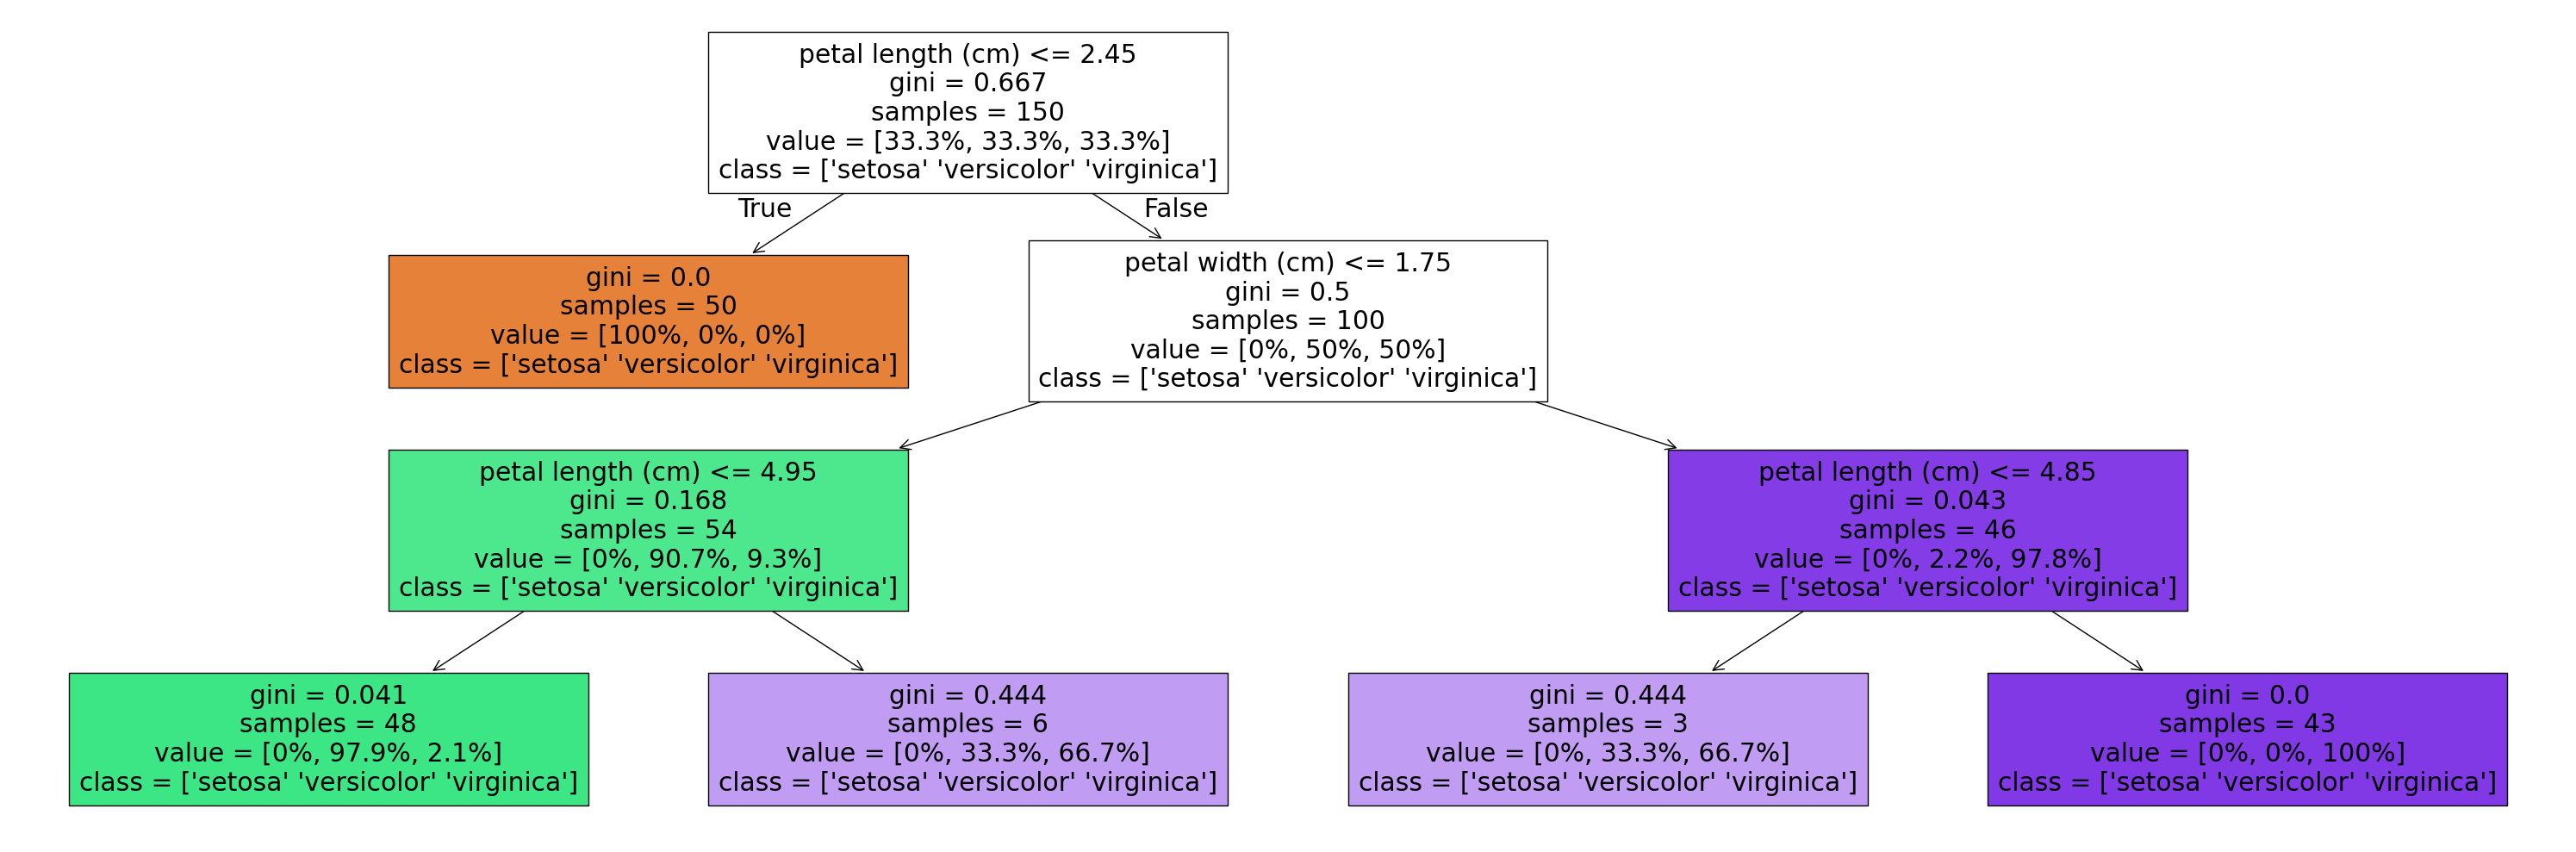

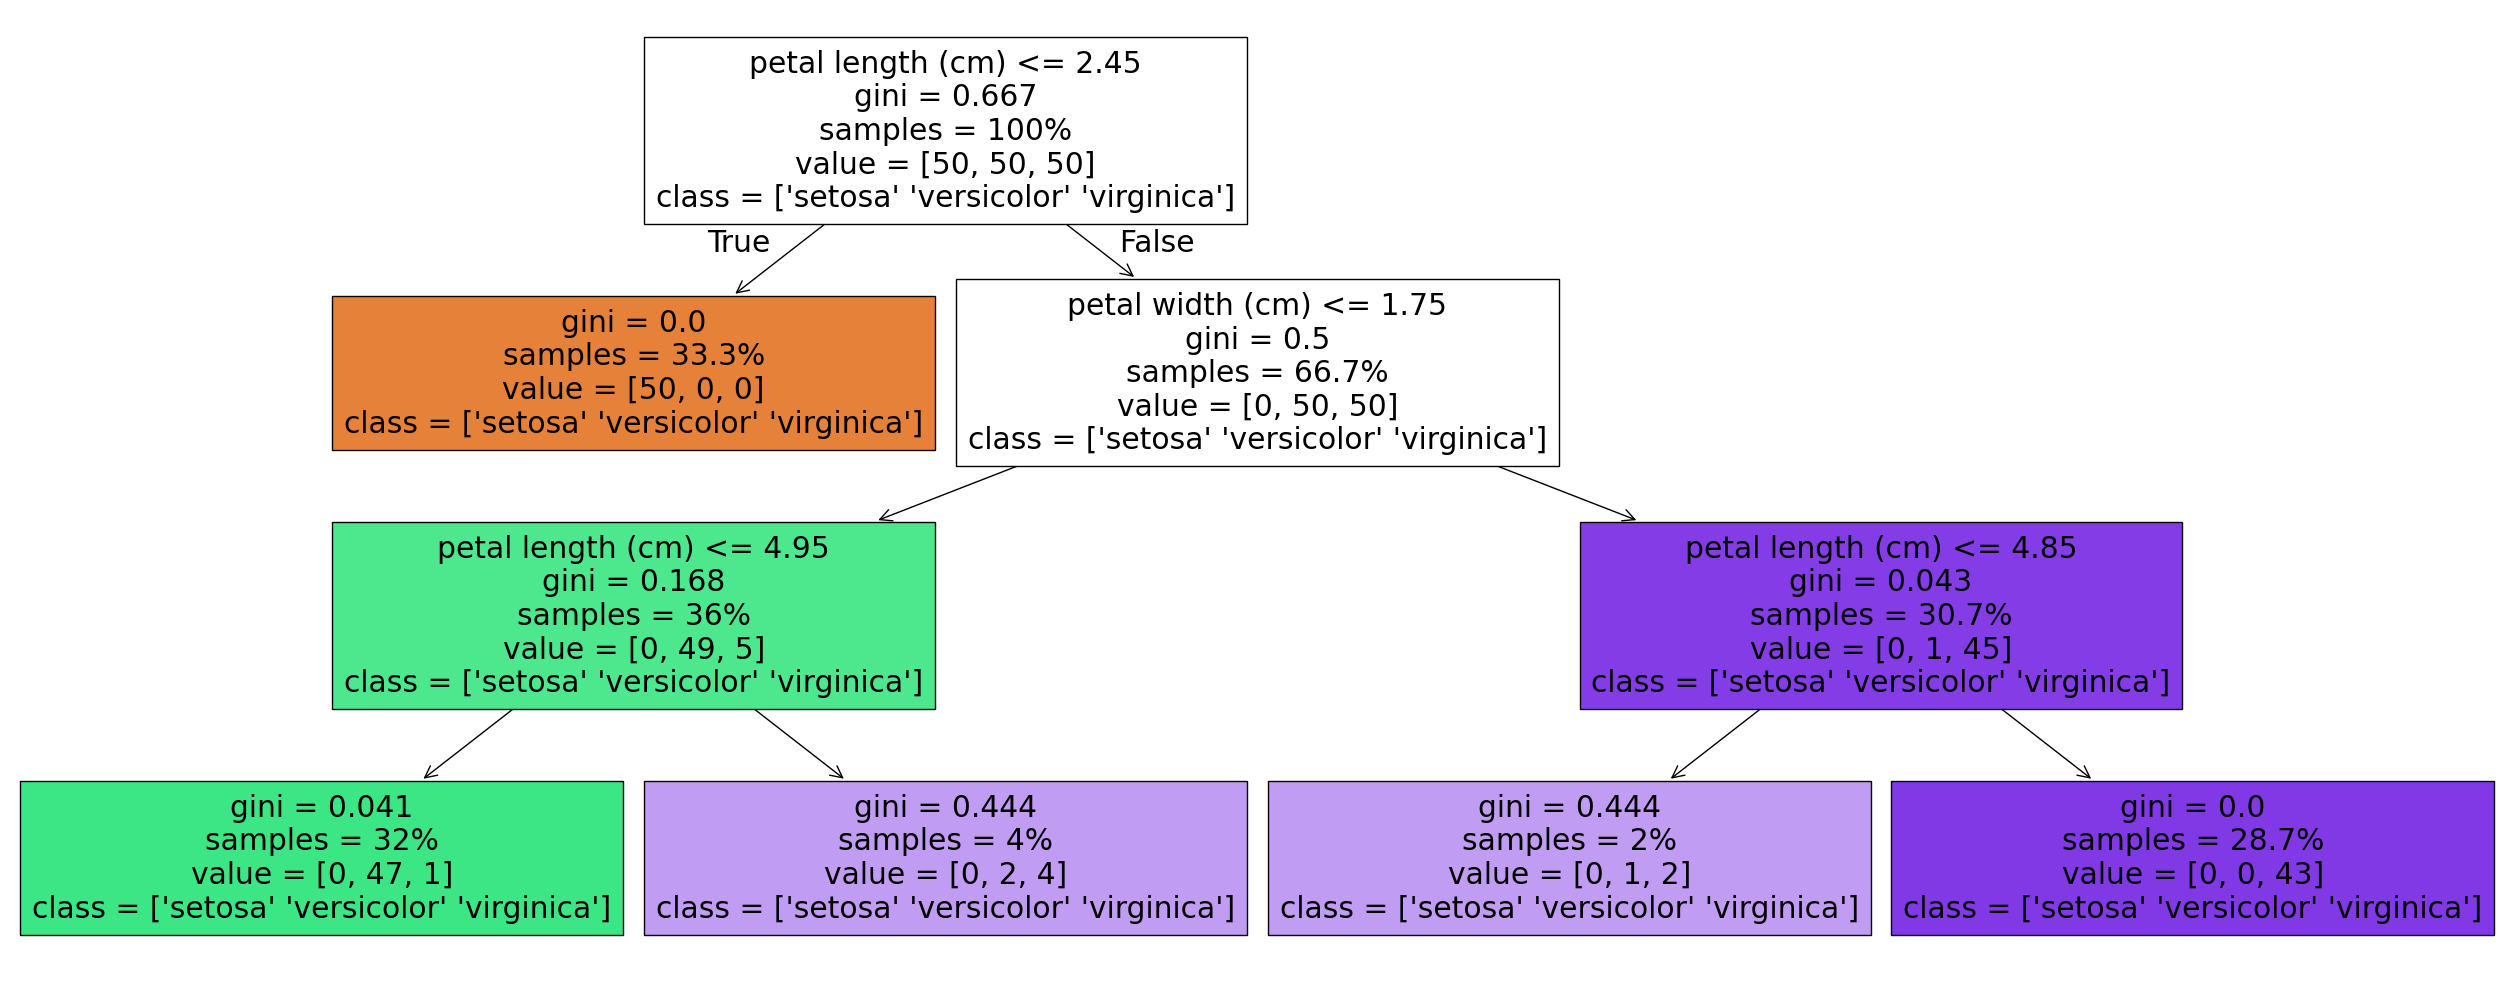

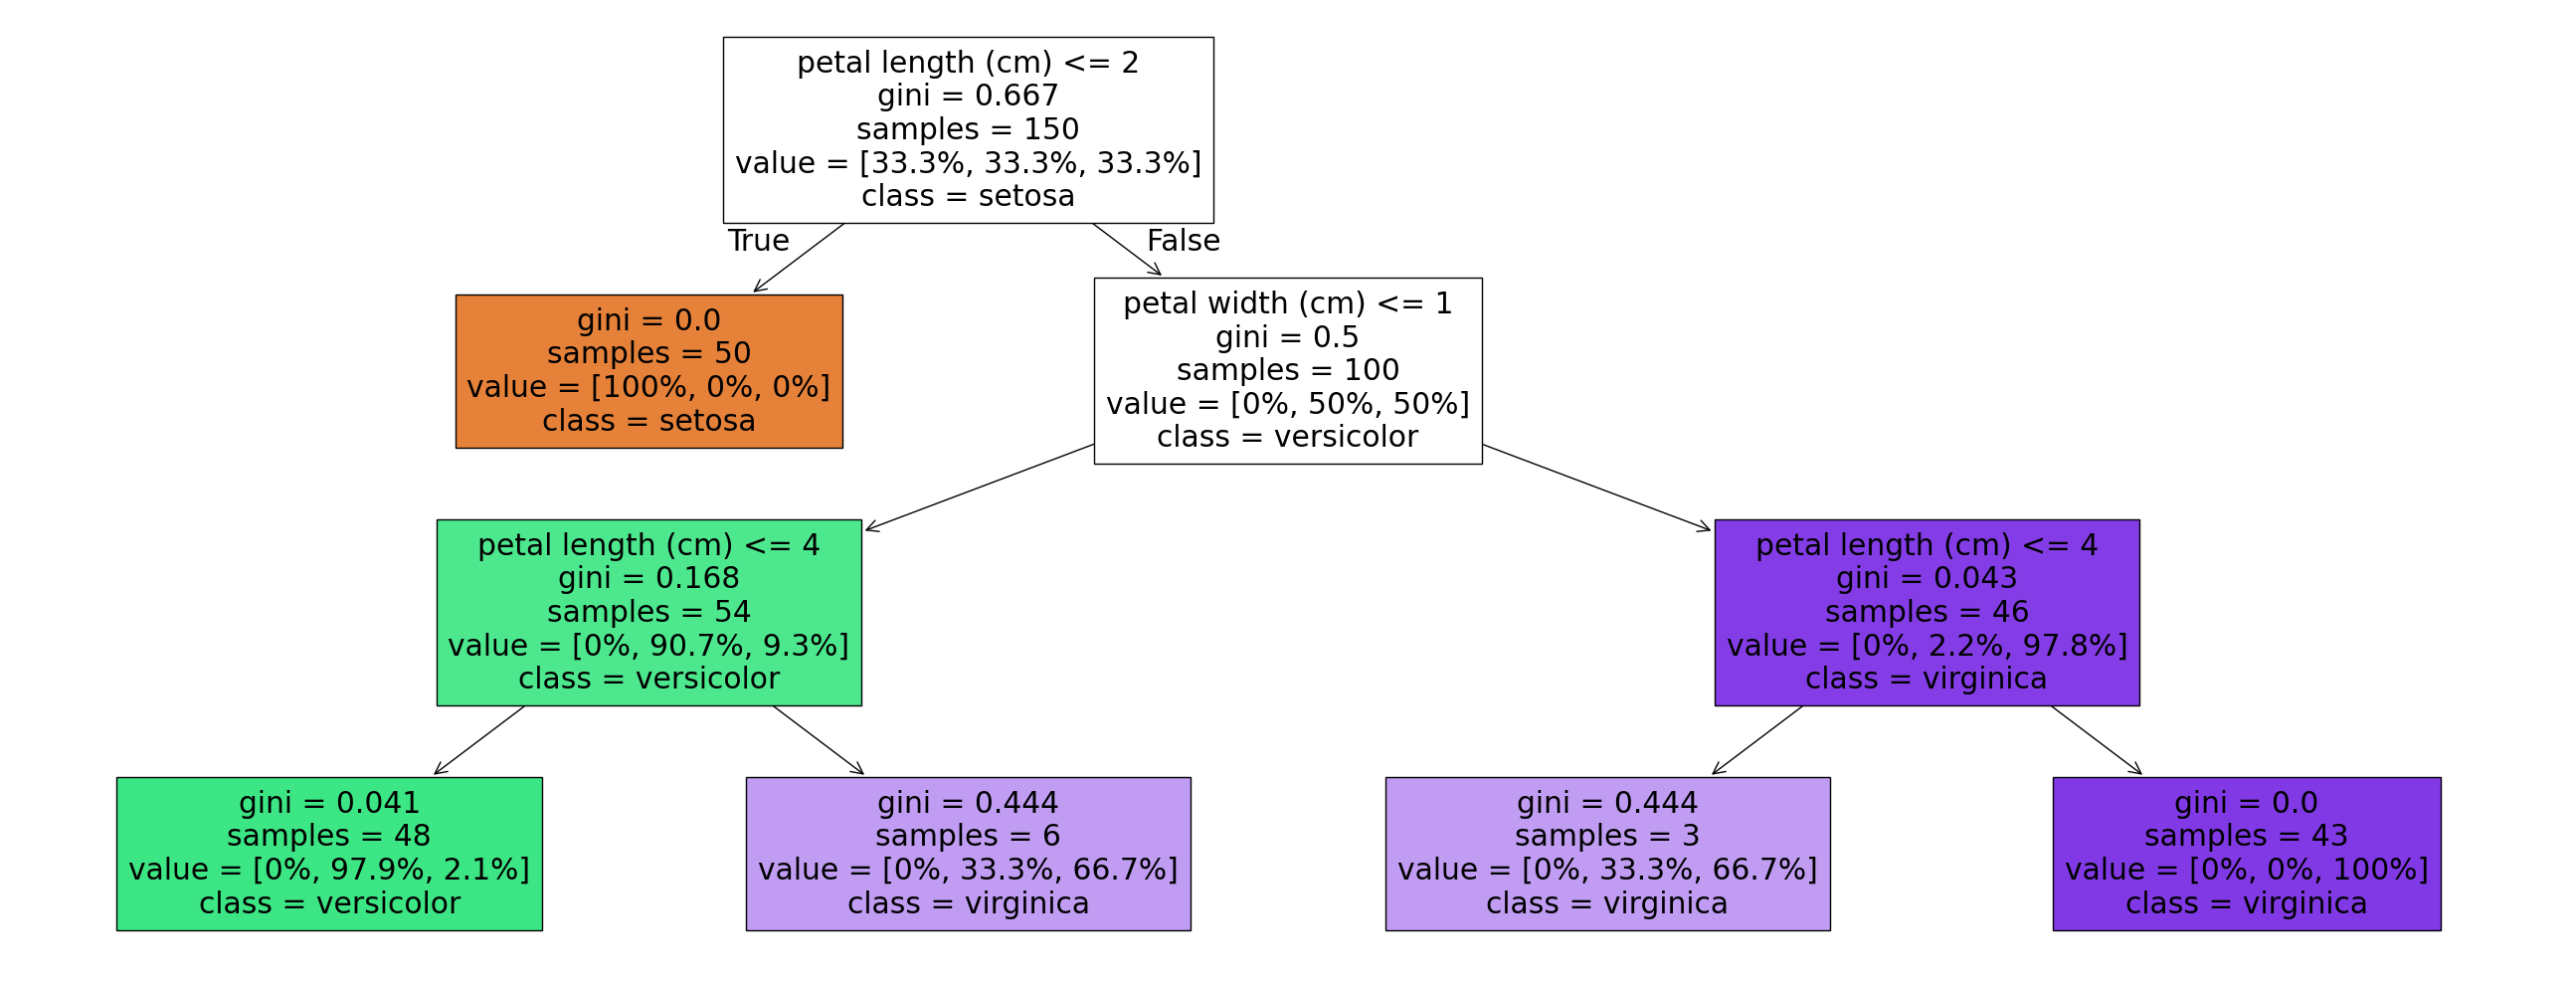

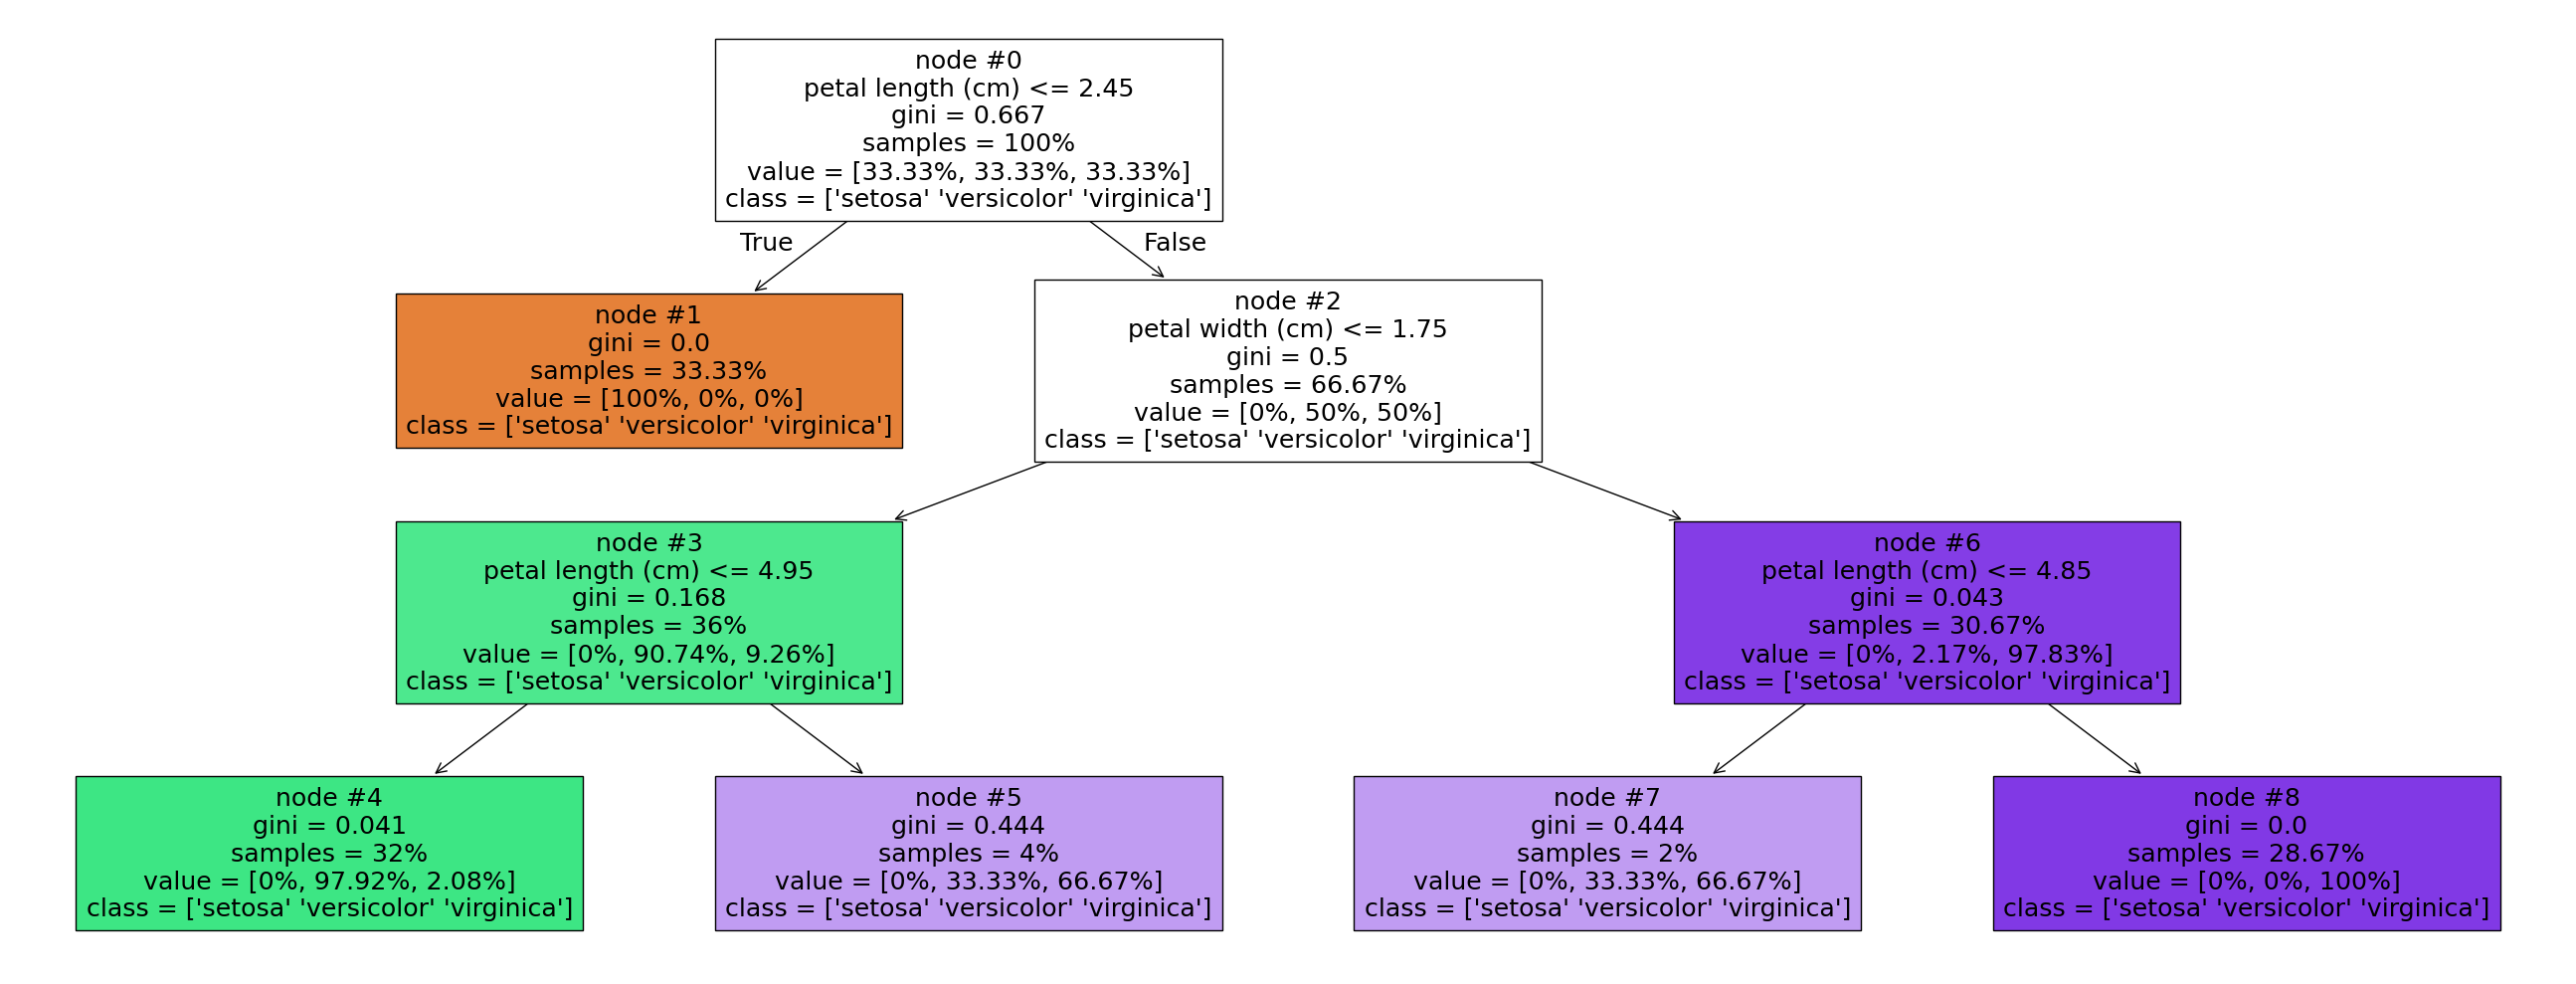

In [2]:
# Usage example
def example():
    from sklearn import datasets
    from sklearn.tree import DecisionTreeClassifier
    
    # Load dataset
    iris = datasets.load_iris()
    X = iris.data
    y = iris.target
    
    # Train a decision tree
    clf = DecisionTreeClassifier(max_depth=3, random_state=42)
    clf.fit(X, y)
    
    # Get total training sample size
    total_samples = int(clf.tree_.n_node_samples[0])
    print("Total training samples:", total_samples)
    
    # Example 1: Default - values as percentages, samples as numbers
    fig1, ax1 = plot_formatted_tree(
        clf,
        feature_names=iris.feature_names,
        class_names=iris.target_names,
        value_format="percentage",
        samples_format="number",
        figsize=(30, 10)
    )
    # fig1.savefig('tree_default.png')
    
    # Example 2: Values as numbers, samples as percentages
    fig2, ax2 = plot_formatted_tree(
        clf,
        feature_names=iris.feature_names,
        class_names=iris.target_names,
        value_format="number",
        samples_format="percentage",
        figsize=(26, 10)
    )
    # fig2.savefig('tree_samples_pct.png')
    
    # Example 3: Integer thresholds
    fig3, ax3 = plot_formatted_tree(
        clf,
        feature_names=iris.feature_names,
        class_names=iris.target_names,
        value_format="percentage",
        samples_format="number",
        integer_thresholds=True,
        class_display="one",
        figsize=(26, 10)
    )
    # fig3.savefig('tree_integer_thresholds.png')
    
    # Example 4: All percentages with custom decimal places
    fig4, ax4 = plot_formatted_tree(
        clf,
        feature_names=iris.feature_names,
        class_names=iris.target_names,
        value_format="percentage",
        samples_format="percentage",
        max_decimal_places=2,  # Show 2 decimal places
        node_ids=True,  # Show node IDs
        figsize=(26, 10)
    )
    # fig4.savefig('tree_all_pct.png')
    
    return clf

if __name__ == "__main__":
    example()

# Example - get null nodes from a tree

In [3]:
import pandas as pd
import numpy as np

# Example: Loan approval dataset
df = pd.DataFrame({
    'age': [25, 45, 35, 50, 29, 60, 40, 33],
    'credit_score': [680, 720, 690, 710, 650, 730, 700, 670],
    'loan_amount': [20000, 30000, 25000, 27000, 22000, 26000, 24000, 23000],
    'income': [50000, 120000, 75000, 100000, np.nan, 80000, 95000, np.nan],
    'defaulted': [0, 0, 1, 0, 1, 0, 0, 1]  # target variable
})

df.head()

,age,credit_score,loan_amount,income,defaulted
0,25,680,20000,50000.0,0
1,45,720,30000,120000.0,0
2,35,690,25000,75000.0,1
3,50,710,27000,100000.0,0
4,29,650,22000,NaN,1


In [4]:
from sklearn.tree import DecisionTreeClassifier

# Prepare features and target
X = df[['credit_score', 'loan_amount', 'income']]
y = df['defaulted']

# Train decision tree
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X, y)

DecisionTreeClassifier(random_state=42)

In [5]:
# Check which features were used by the trained DecisionTreeClassifier
used_features = [X.columns[i] for i in np.unique(clf.tree_.feature) if i != -2]
print("Features used by the DecisionTreeClassifier:", used_features)

Features used by the DecisionTreeClassifier: ['loan_amount', 'income']


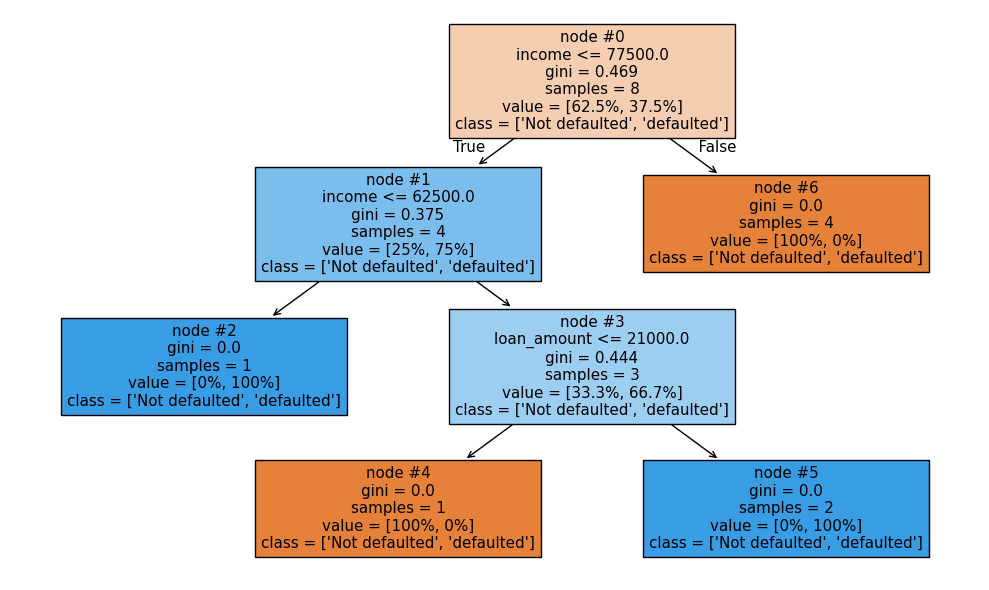

In [6]:
# Plot the trained decision tree using plot_formatted_tree
fig, ax = plot_formatted_tree(
    clf,
    feature_names=X.columns,
    class_names=['Not defaulted', 'defaulted'],
    value_format="percentage",
    samples_format="number",
    node_ids=True,
    figsize=(10, 6)
)

In [7]:
# Example usage:
nulls_in_leaf_nodes = get_nulls_in_leaf_nodes(clf, X, df, 'leaf_node', ['income'])

# Display the results
for leaf, details in nulls_in_leaf_nodes.items():
    print(f"leaf {leaf}: null_count: {details['null_count']} ")


leaf 5: null_count: 2 


In [8]:
nulls_in_leaf_nodes

{5: {'null_count': 2, 'sample_indices': [4, 7], 'total_samples_in_leaf': 3}}

# Example - summarize tree to table

In [9]:
# Get feature names
feature_names = X.columns.tolist()

# Summarize leaf nodes
leaf_summary_df = summarize_tree(clf, feature_names, class_list=['Not defaulted', 'Defaulted'])
leaf_summary_df

,leaf_index,income,loan_amount,Sample Size,Not defaulted,Defaulted
0,2,<= 62500,,1,0,1
1,4,"> 62500, <= 77500",<= 21000,1,1,0
2,5,"> 62500, <= 77500",> 21000,1,0,1
3,6,> 77500,,1,1,0
